# 당뇨병 예측

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import diabetes

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(diabetes_data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [5]:
data = diabetes_data.drop('Outcome', axis=1)
label = diabetes_data['Outcome']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, label)

## 선형모델 생성

In [7]:
model = LogisticRegression() # 모델 생성
model.fit(x_train, y_train) # 모델 학습

/opt/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
pred = model.predict(x_test)
pp = model.predict_proba(x_test)[:,1]

In [9]:
sdf = pd.DataFrame()
sdf['pred'] = pred
sdf['pp'] = pp
sdf

,pred,pp
0,1,0.829732
1,0,0.060963
2,0,0.117216
3,0,0.160571
4,0,0.044533
...,...,...
187,0,0.453731
188,0,0.231066
189,0,0.055500
190,0,0.149755


In [10]:
diabetes.get_model_eval(y_test, pred)

오차 행렬
 [[115  18]
 [ 21  38]]
정확도:0.7969 정밀도:0.6786
재현율:0.6441 F1 점수:0.6609


In [11]:
prec, rec, thres = precision_recall_curve(y_test, pp)

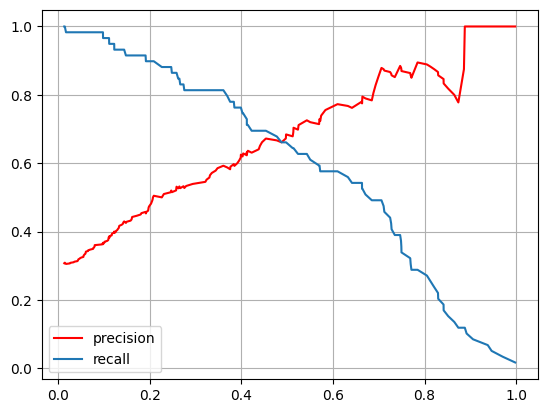

In [12]:
plt.plot(thres, prec[:-1], 'r-', label='precision')
plt.plot(thres, rec[:-1], label='recall')
plt.grid()
plt.legend()
plt.show()

In [13]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


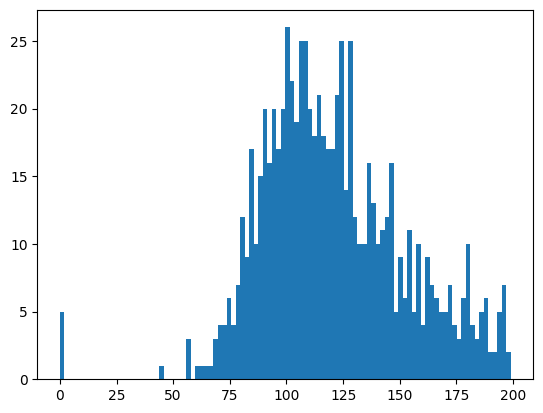

In [14]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

## 0 값을 가지고 있는 feature 개수 파악

In [15]:
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
total_count = diabetes_data['Glucose'].count()
print(total_count)

768


In [16]:
for feature in zero_features:
    zc = diabetes_data[diabetes_data[feature]==0][feature].count()
    print(f'{feature} 0의 건수는 {zc}, 퍼센트: {zc/total_count:.2f}%')

Glucose 0의 건수는 5, 퍼센트: 0.01%
BloodPressure 0의 건수는 35, 퍼센트: 0.05%
SkinThickness 0의 건수는 227, 퍼센트: 0.30%
Insulin 0의 건수는 374, 퍼센트: 0.49%
BMI 0의 건수는 11, 퍼센트: 0.01%


### 0 값을 평균 값으로 교체

In [17]:
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [18]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Scaling

In [19]:
data = diabetes_data.drop('Outcome', axis=1) # reset data
label = diabetes_data['Outcome'] # reset data

scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [20]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-1.595946e-16,1.156482e-17,2.868076e-16,-4.394633e-17,-3.168762e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.553955e+00,-3.985352e+00,-2.037044e+00,-1.125139e+00,-2.074083e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.210503e-01,-6.817623e-01,-6.306536e-01,-4.177681e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.539182e-01,-2.104440e-02,-3.747004e-01,-4.177681e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.104773e-01,6.396735e-01,5.603676e-01,9.234424e-02,6.038797e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542014e+00,4.108443e+00,7.521430e+00,7.819199e+00,5.042893e+00,5.883565e+00,4.063716e+00


In [21]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, label)

In [22]:
model = LogisticRegression() # 모델 생성
model.fit(x_train, y_train) # 모델 학습
pred = model.predict(x_test)
pp = model.predict_proba(x_test)[:,1]
diabetes.get_model_eval(y_test, pred)

오차 행렬
 [[111  22]
 [ 24  35]]
정확도:0.7604 정밀도:0.6140
재현율:0.5932 F1 점수:0.6034


In [23]:
thres = np.arange(0.3, 0.6, 0.03)
diabetes.get_eval_by_thresholds(y_test, pp.reshape(-1,1), thres)

=== threshold: 0.3
오차 행렬
 [[89 44]
 [ 7 52]]
정확도:0.7344 정밀도:0.5417
재현율:0.8814 F1 점수:0.6710
=== threshold: 0.32999999999999996
오차 행렬
 [[95 38]
 [12 47]]
정확도:0.7396 정밀도:0.5529
재현율:0.7966 F1 점수:0.6528
=== threshold: 0.35999999999999993
오차 행렬
 [[97 36]
 [14 45]]
정확도:0.7396 정밀도:0.5556
재현율:0.7627 F1 점수:0.6429
=== threshold: 0.3899999999999999
오차 행렬
 [[102  31]
 [ 16  43]]
정확도:0.7552 정밀도:0.5811
재현율:0.7288 F1 점수:0.6466
=== threshold: 0.4199999999999999
오차 행렬
 [[104  29]
 [ 18  41]]
정확도:0.7552 정밀도:0.5857
재현율:0.6949 F1 점수:0.6357
=== threshold: 0.44999999999999984
오차 행렬
 [[105  28]
 [ 20  39]]
정확도:0.7500 정밀도:0.5821
재현율:0.6610 F1 점수:0.6190
=== threshold: 0.4799999999999998
오차 행렬
 [[109  24]
 [ 22  37]]
정확도:0.7604 정밀도:0.6066
재현율:0.6271 F1 점수:0.6167
=== threshold: 0.5099999999999998
오차 행렬
 [[112  21]
 [ 24  35]]
정확도:0.7656 정밀도:0.6250
재현율:0.5932 F1 점수:0.6087
=== threshold: 0.5399999999999998
오차 행렬
 [[118  15]
 [ 24  35]]
정확도:0.7969 정밀도:0.7000
재현율:0.5932 F1 점수:0.6422
=== threshold: 0.5699999999999997
